# Fuzzy logic

Install following prerequisities:

In [ ]:
# Example
!pip install scikit-fuzzy

# Example 1

Create fuzzy sets for input variable temperature


0.0
0.0
0.6923076923076923



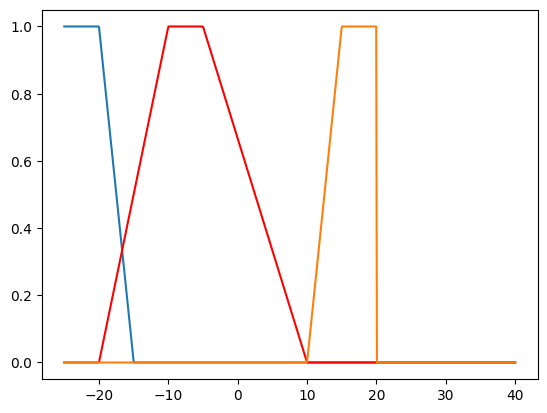

In [ ]:
# Example 1
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

temp_x = np.linspace(-25,40,650)

# memebership functions
very_cold = fuzz.trapmf(temp_x, [-25, -25, -20, -15])
cold = fuzz.trapmf(temp_x, [-20, -10, -5, 10] )
warm = fuzz.trapmf(temp_x, [10, 15, 20, 20 ] )


plt.plot(temp_x, very_cold)
plt.plot(temp_x, cold, c = 'red')
plt.plot(temp_x, warm)

print(fuzz.interp_membership(temp_x, very_cold, 20))
print(fuzz.interp_membership(temp_x, cold, 20))
print(fuzz.interp_membership(temp_x, warm, 20))
print()

## Task 1

Create fuzzy set for cold, warm and hot and plot all memebership functions to a single graph.

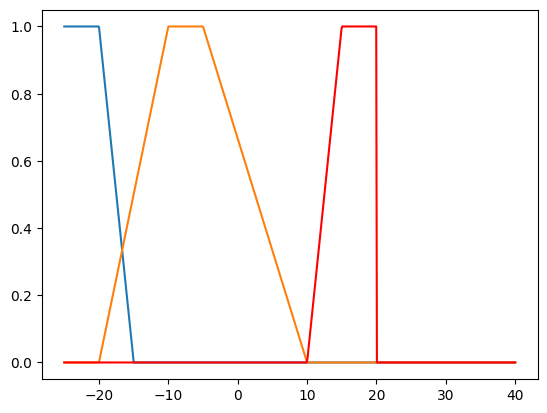

In [ ]:
# Write your code here
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

temp_x = np.linspace(-25,40,650)

cold = fuzz.trapmf(temp_x, [-25, -25, -20, -15])
warm = fuzz.trapmf(temp_x, [-20, -10, -5, 10] )
hot = fuzz.trapmf(temp_x, [10, 15, 20, 20 ] )


plt.plot(temp_x, cold)
plt.plot(temp_x, warm)
plt.plot(temp_x, hot, c = 'red')


## Task 2

Create fuzzy sets low, medium, high for heating.

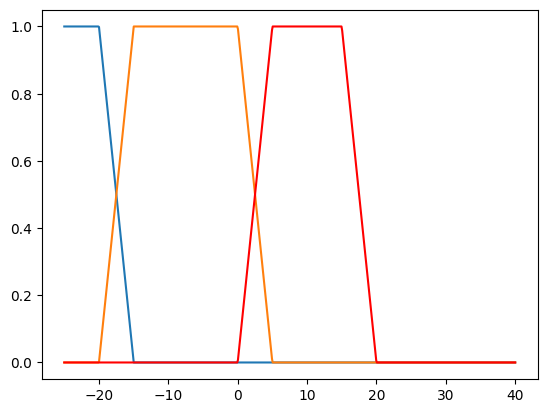

In [ ]:
# Write your code here
heating = np.linspace(-25,40,650)

low = fuzz.trapmf(heating, [-25, -25, -20, -15])
medium = fuzz.trapmf(heating, [-20, -15, 0, 5] )
high = fuzz.trapmf(heating, [0, 5, 15, 20 ] )


plt.plot(heating, low)
plt.plot(heating, medium)
plt.plot(heating, high, c = 'red')

## Task 3

Create fuzzy sets closed, partially, half, nearly, open.

In [ ]:
# Write your code here

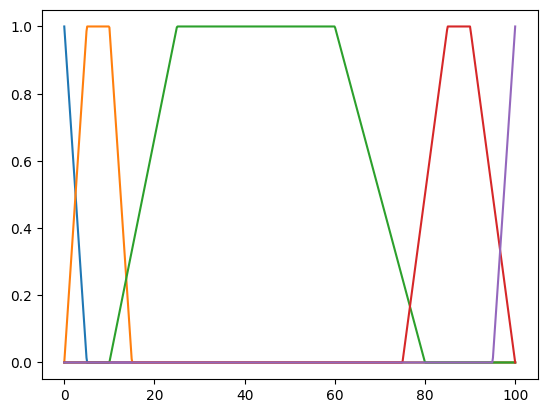

In [ ]:
# Write your code here
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

win_angle = np.linspace(0,100,650)

closed = fuzz.trapmf(win_angle, [0,0, 0, 5])
part_ = fuzz.trapmf(win_angle, [0, 5, 10, 15] )
half = fuzz.trapmf(win_angle, [10, 25, 60, 80 ] )
nearly = fuzz.trapmf(win_angle, [75, 85, 90, 100] )
open = fuzz.trapmf(win_angle, [95, 100, 100, 100 ] )

plt.plot(win_angle, closed)
plt.plot(win_angle, part_)
plt.plot(win_angle, half)
plt.plot(win_angle, nearly)
plt.plot(win_angle, open)


## Task 4

According to this tutorial create fuzzy system.
https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem_newapi.html


Create rules for our fuzzy variable window, temperature, heating and observe the fuzzy output.

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
win = ctrl.Antecedent(np.arange(0, 100, 1), 'window')
temp = ctrl.Antecedent(np.arange(-20, 40, 1), 'temp')
heating = ctrl.Consequent(np.arange(0, 100, 1), 'heating')
# mebership functions
heating['low'] = fuzz.trimf(heating.universe, [0, 0, 13])
heating['medium'] = fuzz.trimf(heating.universe, [0, 13, 25])
heating['high'] = fuzz.trimf(heating.universe, [13, 25, 25])

temp['cold'] = fuzz.trimf(temp.universe, [-25, -25, -20])
temp['warm'] = fuzz.trimf(temp.universe, [-15, 0, 5])
temp['hot'] = fuzz.trimf(temp.universe, [0, 5, 15])

win['closed'] = fuzz.trimf(win.universe, [0, 0, 5])
win['half'] = fuzz.trimf(win.universe, [10, 25, 60 ])
win['opened'] = fuzz.trimf(win.universe, [95, 100, 100])



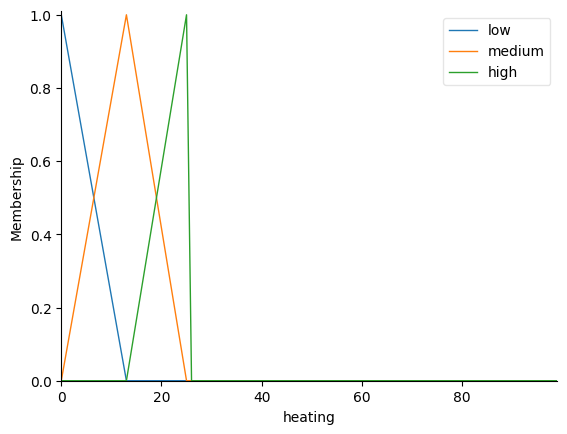

In [ ]:
heating.view()

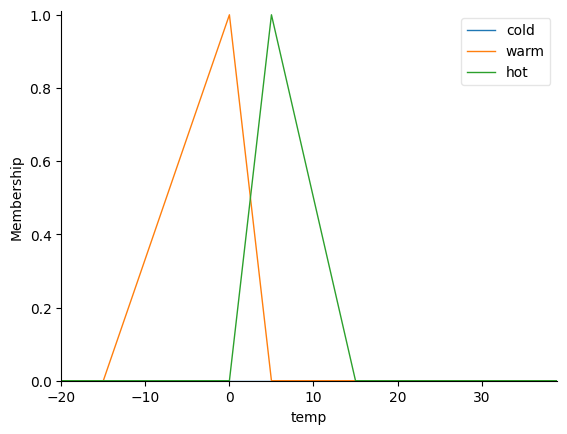

In [ ]:
temp.view()

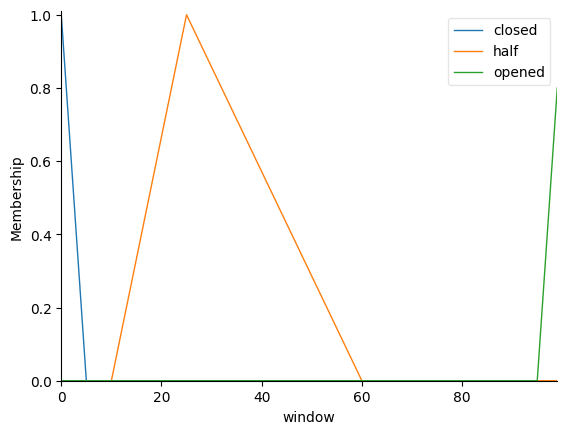

In [ ]:
win.view()

Heating Level: 5


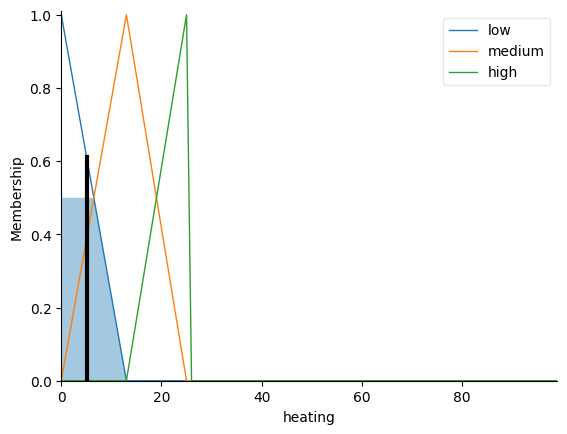

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

#fuzzy input and out variables variables
temp = ctrl.Antecedent(np.arange(-25, 100, 1), 'temperature')
win = ctrl.Antecedent(np.arange(0, 101, 1), 'window_openness')
heating = ctrl.Consequent(np.arange(0,100, 1), 'heating')

# We created our own Custom membership functions
# heating memebership funcs
heating['low'] = fuzz.trimf(heating.universe, [0, 0, 13])
heating['medium'] = fuzz.trimf(heating.universe, [0, 13, 25])
heating['high'] = fuzz.trimf(heating.universe, [13, 25, 25])
# Temeprature Membership funcs
temp['cold'] = fuzz.trimf(temp.universe, [-25, -25, -20])
temp['warm'] = fuzz.trimf(temp.universe, [-15, 0, 5])
temp['hot'] = fuzz.trimf(temp.universe, [0, 5, 15])
# Windows status (window is opened, half opened or closed)
win['closed'] = fuzz.trimf(win.universe, [0, 0, 5])
win['half'] = fuzz.trimf(win.universe, [10, 25, 60 ])
win['opened'] = fuzz.trimf(win.universe, [95, 100, 100])

# Fuzzy rules based on provided conditions(This is inference rules of the systems)
rule1 = ctrl.Rule(temp['hot'], heating['low'])
rule2 = ctrl.Rule(temp['cold'], heating['high'])
rule3 = ctrl.Rule(temp['cold'] & win['closed'], heating['medium'])
rule4 = ctrl.Rule(temp['warm'] & win['opened'], heating['medium'])
rule5 = ctrl.Rule(temp['cold'] & win['opened'], heating['high'])
rule6 = ctrl.Rule(temp['warm'] & ~win['opened'], heating['low'])
rule7 = ctrl.Rule(temp['warm'] & win['opened'] & win['closed'], heating['high'])
rule8 = ctrl.Rule(temp['warm'] & win['closed'], heating['low'])
rule9 = ctrl.Rule(temp['warm'] & ~win['opened'] & win['closed'], heating['medium'])

# Create and simulate the fuzzy system
heating_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
heating_simulation = ctrl.ControlSystemSimulation(heating_ctrl, clip_to_bounds=False)

# Set input values(if temp=10, win=70% opened, then heating=?)
# # I made this interactive by taking input on runtime
# temp = int(input('Enter temparature here: '))
# win = int(input('Enter how much window is opened (b/w 1-100)? : '))
temp = 10
win = 70
heating_simulation.input['temperature'] = temp
heating_simulation.input['window_openness'] = win

# Compute the output(i.e. heating)
heating_simulation.compute()

print(f"Heating Level: {int(heating_simulation.output['heating'])}")

# Visualize the result
heating.view(sim=heating_simulation)

plt.show()
